### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# k-NN 분류 (최근접 이웃)

- k-NN 은 대표적인 분류 알고리즘 중의 하나이다.
- k-NN 에서 NN 은 Nearest Neighbors 즉, 가장 가까운 점들이라는 의미이며, k 는 가장 가까운 이웃의 갯수를 의미한다.
- 예측하려고 하는 점 주위에 가장 가까이 있는 점들의 타겟값(클래스) 를 비교하여 해당 클래스를 판정한다.

> 주의 : 가깝다 멀다를 평가하는 지표를 **거리(distance)** 라고 한다. 거리를 어떻게 측정하느냐에 따라 다양한 방식을 적용할 수 있다. 하지만 일반적으로는 좌표상의 거리로 생각하자.

> 참고 : <br>
> scikit-learn 메뉴얼 http://scikit-learn.org/stable/modules/neighbors.html<br>
> wekipedia https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

- k-NN 은 가장 직관적이고 알고리즘이 간단하여 가장 많이 애용되는 분류 알고리즘이다.
- 하지만 전문적으로 들어가면 거리를 측정하는 방식, 점들마다 가중치를 부여하는 방식 등 다양한 옵션을 줄 수 있어 그렇게 간단하지만도 않다.

<img src="ch02_04.jpg" />
<p style="text-align: center;">(출처 : wikipedia)</p>

- 위의 그림을 예로 들어 k-NN 을 설명하겠다.
- 파란색 클래스가 6개, 빨간색 클래스가 5개 있다. 여기서 녹색점은 빨간색으로 예측해야 할까 아니면 파란색으로 예측해야 할까?
- k=3 인 경우 녹색점에서 가장 가까운 점 3개를 비교한다. 빨간 점이 많으므로 녹색점은 빨간색 클래스로 판정한다.
- k=5 인 경우 가까운 5개의 점 중에서 파란색이 3개로 많으므로 녹색점을 파란색 클래스로 판정한다.

<img src="ch02_06.jpg" />
<p style="text-align: center;">(출처 : wikipedia.org)</p>

In [97]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1A2BF570>,
      dtype=object)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


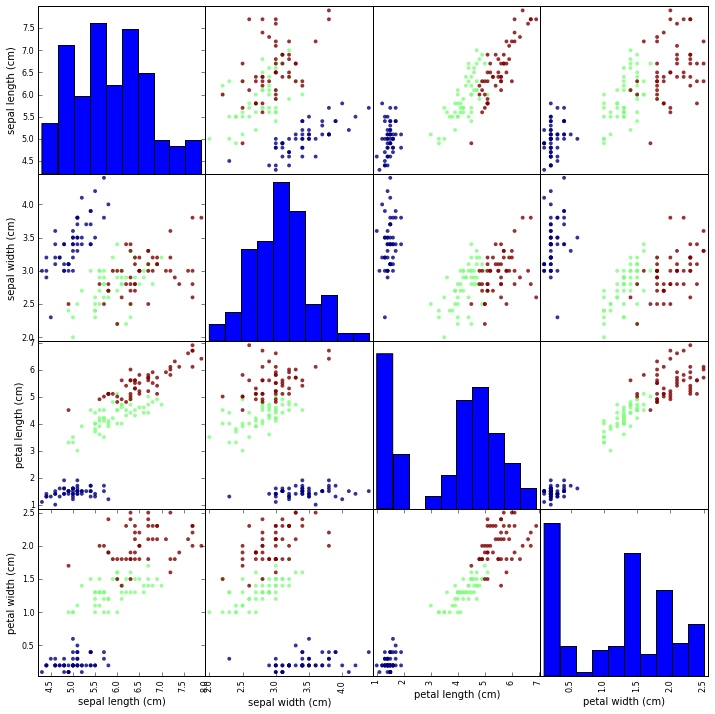

In [98]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, s=60, alpha=0.8, figsize=[12,12])

- 위의 산점도맵에서 petal width 와 sepal length 를 선택하여 k-NN 을 적용해 보겠다. 속성을 2가지만 선택한 이유는 결과를 시각화 하기 위해서이다.
- train_test_split() 에서 random_state 값을 지정한 이유는 항상 똑같은 결과를 얻고 확인하기 위해서이다

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

col1 = 3 # petal width
col2 = 0 # sepal length

X = iris.data[:,[col1, col2]] # 속성 2개만 골라냄
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

- 아래에서 k-NN 을 적용한다. 먼저 k=1 인 경우를 알아보자.
- k-NN 모델은 sklearn.neighbors.KNeighborsClassifier 을 사용한다. (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- 아래 소스의 중간의 복잡한 부분은 경계영역을 그리기 위한 것이다. 당장 다 이해할 필요는 없겠다.

0.9210526315789473

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


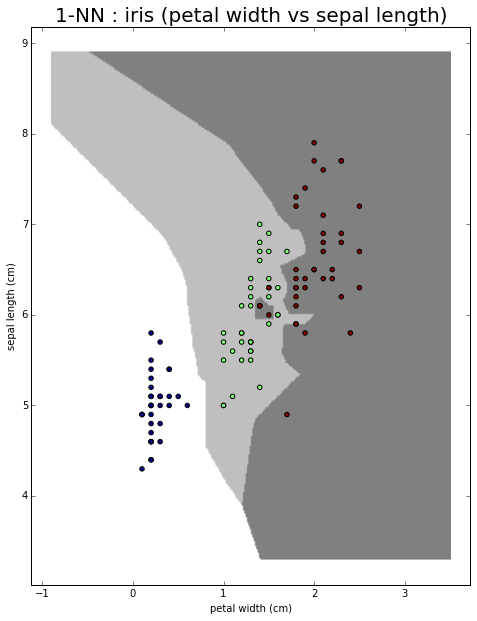

In [100]:
model = KNeighborsClassifier(n_neighbors=1) # 1!!!
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
display(score)

# draw boundary
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.5, cmap='gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.title('1-NN : iris (petal width vs sepal length)',fontsize=20)

- 아래는 k=3 인 경우이다.

1.0

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


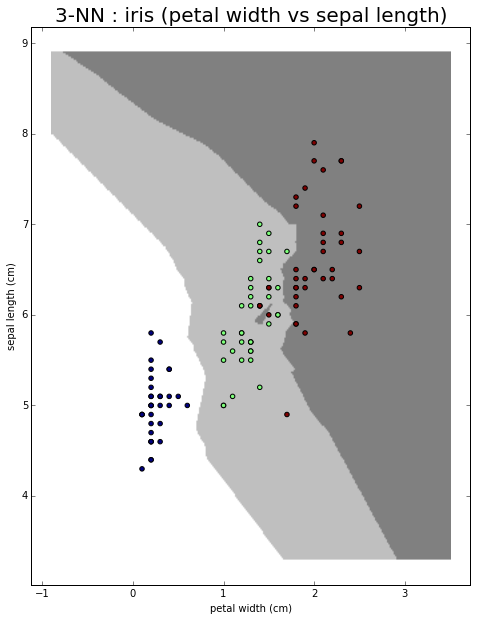

In [101]:
model = KNeighborsClassifier(n_neighbors=3) # 3!!!
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
display(score)

# draw boundary
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.5, cmap='gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.title('3-NN : iris (petal width vs sepal length)',fontsize=20)

- 아래는 k=5 인 경우이다.

0.9736842105263158

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


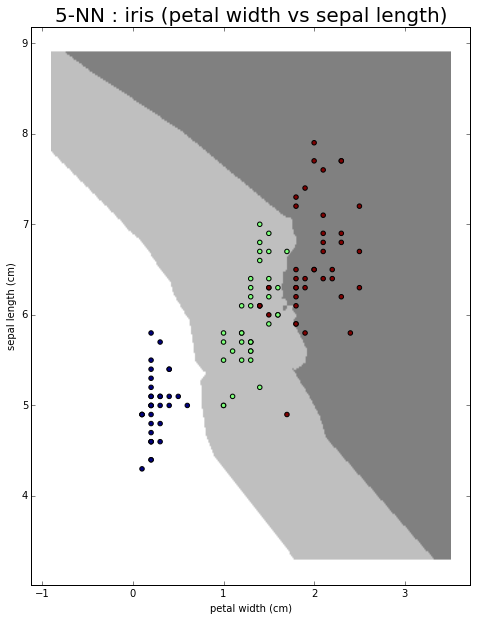

In [102]:
model = KNeighborsClassifier(n_neighbors=5) # 5!!!
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
display(score)

# draw boundary
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.5, cmap='gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.title('5-NN : iris (petal width vs sepal length)',fontsize=20)

- 아래는 k=5 인 경우 제대로 예측하지 못한 점이 있다. 이것이 무엇인지 알아 보기 위해 테스트세트를 그려보자.

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


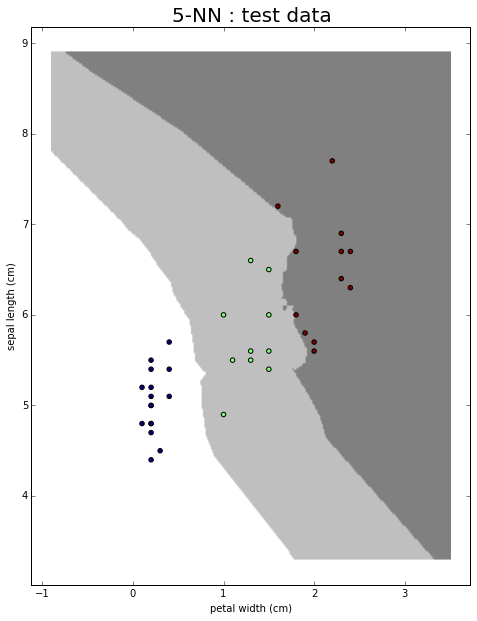

In [103]:
# draw boundary
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.5, cmap='gray_r')

# draw X_test!!!
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.title('5-NN : test data',fontsize=20)

- 경계 근처에서 한 점이 확인된다. 해당 점의 자세한 정보를 아래에서 확인할 수 있다.

In [104]:
pred_y = model.predict(X_test)

display(np.where(pred_y != y_test)) # 예측이 틀린 점의 index 를 출력
display(X_test[pred_y != y_test], y_test[pred_y != y_test]) # 해당 점의 좌표와 타겟값 출력

(array([31], dtype=int32),)

array([[1.8, 6. ]])

array([2])

In [105]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [ca

- 위 도움말에서 주의해서 봐야 할 옵션은 **weights** 와 **metric** 이다.
- **weights** 옵션은 가까이에 있는 점 일수록 가중치를 준다고 생각하면 된다. k=3 에서 거리가 각각 (1,2,3) 이라면 가중치가 거리의 역수인 경우라면 (1/1, 1/2, 1/3) 이 된다. 첫번째 점이 class1, 두번째와 세번째 점이 class2 인 경우, 1/1 > 1/2 + 1/3 이므로 class1 으로 판정한다.
- **metric** 옵션은 두 점 사이의 거리를 재는 방식이다. 기존의 거리와 완전히 다른 새로운 방식을 적용하면 상당히 신기한 모델을 만들 수 있다. (예를 들어 너무 가까이에 있는 점들은 거리를 무한대로 주면 어떻게 될까? 또는 기존 거리에 sin 함수를 적용하면 어떻게 될까?)

### k-NN 의 특징
- k 값이 커질 수록 결정경계가 부드러워지는 것을 확인할 수 있다. 왜 그럴까?
- k 가 작으면 **과대적합**, k 가 크면 **과소적합** 인 경향을 보인다.
- 위의 예제에서, fit() 함수를 호출할 때 사실은 훈련데이터를 읽어오는 일만 하고 복잡한 작업을 거의 하지 않는다. 즉 모델을 훈련시키는 부하는 거의 없다. => **장점**
- 하지만 한 점을 예측하려고 하면, 모든 훈련데이터의 점들과 거리를 비교해야 한다. 이것은 상당히 부하가 많이 발생하는 일이므로 예측할 때 많은 시간이 소요될 수 있다. => **단점**
- k-NN 에서는 동점이 나오는 경우가 생긴다. 이럴 경우 알고리즘 내부적으로 판단한다.
- 아래에서 k 값이 변할 때, 훈련세트와 테스트세트에서 점수가 어떻게 변하는 지를 보여준다.

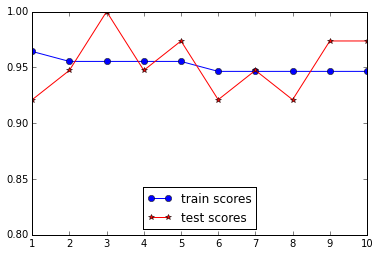

In [106]:
train_scores = []
test_scores = []

for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)

    score1 = model.score(X_train, y_train)
    score2 = model.score(X_test, y_test)
    
    train_scores.append(score1)
    test_scores.append(score2)
    
plt.plot(range(1,11),train_scores,'bo-',label='train scores')
plt.plot(range(1,11),test_scores,'r*-',label='test scores')
plt.ylim(0.8,1.)
plt.legend(loc='lower center')